In [1]:
%pip install stim~=1.14
%pip install numpy~=1.0  # 1.0 instead of 2.0 for pymatching compatibility later
%pip install scipy

  Obtaining dependency information for stim~=1.14 from https://files.pythonhosted.org/packages/a8/82/0a01580071c6d50107298e93faa88250fc30f1538117ec887ec48de7816d/stim-1.15.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import stim
print(stim.__version__)

1.15.0


In [2]:
# Instance of circuit
circuit = stim.Circuit()

# Initialize Bell pair (H-CX)
circuit.append("H", [0])
circuit.append("CNOT", [0, 1])

# Measure of both qubits in Z basis
circuit.append("M", [0, 1])

In [3]:
# display the circuit
circuit

stim.Circuit('''
    H 0
    CX 0 1
    M 0 1
''')

In [4]:
circuit.diagram()

q0: -H-@-M:rec[0]-
       |
q1: ---X-M:rec[1]-

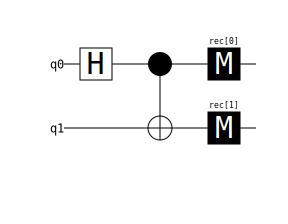

In [5]:
circuit.diagram('timeline-svg')

In [6]:
# 10 measurements from the circuit
sampler = circuit.compile_sampler()
print(sampler.sample(shots = 10))

[[False False]
 [ True  True]
 [False False]
 [ True  True]
 [ True  True]
 [ True  True]
 [False False]
 [ True  True]
 [False False]
 [False False]]


|00⟩ + |11⟩ state

In [7]:
# Adding detector annotations to circuit
circuit.append("DETECTOR", [stim.target_rec(-1), stim.target_rec(-2)]) 
print(repr(circuit))

stim.Circuit('''
    H 0
    CX 0 1
    M 0 1
    DETECTOR rec[-1] rec[-2]
''')


In [8]:
# sample the output with detectors
sampler = circuit.compile_detector_sampler()
print(sampler.sample(shots = 5))

[[False]
 [False]
 [False]
 [False]
 [False]]


In [9]:
# circuit with noise X_error and tick to track progression of time
circuit = stim.Circuit("""
    H 0
    TICK

    CX 0 1
    X_ERROR(0.2) 0 1
    TICK

    M 0 1
    DETECTOR rec[-1] rec[-2]
""")

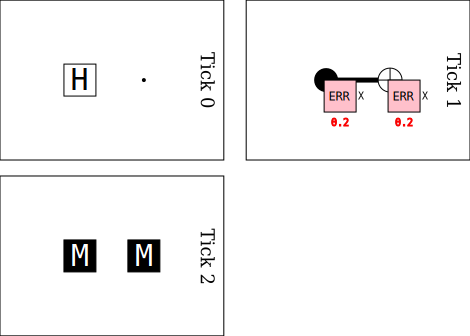

In [10]:
circuit.diagram('timeslice-svg')